FilmSuggest Recommender - MOVIE RECOMMENDATION SYSTEM


As Steve Jobs once said, “People don’t know what they want until you show it to them.” 

Considering we all buy goods suggested by Amazon, watch videos suggested by YouTube, and watch TV shows suggested by Netflix. People like being guided and given recommendations.

Recommendation systems are information filtering systems that provide individual recommendations. Recommendation systems use machine learning algorithms and techniques to give the relevant suggestions to users by learning data (past behaviors) and predicting current interests or preferences.

These systems may provide such recommendations as:

product recommendations (Amazon) and content recommendations (Youtube, Netflix)

Basically there are three types of recommender systems :
    
   - content-based filtering : which generates predictions by analyzing items and searching for similarities between them
   - Collaborative filtering : which generates predictions by analyzing user behavior and matching users with similar tastes
   - hybrid filtering        : which combines two or more models.

In [1]:
# Import the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Loading the dataset

credits = pd.read_csv(r"C:\Users\shres\OneDrive\Desktop\Data Science\Recommendation System\tmdb_5000_credits.csv")
movies = pd.read_csv(r"C:\Users\shres\OneDrive\Desktop\Data Science\Recommendation System\tmdb_5000_movies.csv")

In [3]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

The first dataset contains the following features :

  - movie_id - A identifier for each movie
  - cast - Name of Lead actors and supporting actors.
  - crew = Name of director, Editor, Composer, etc

In [4]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

The second dataset contains the following features :

  - budget - The budget of the movie.
  - genre - The genre of the movie (Action, Comedy , Thriller etc).
  - homepage - Link to the homepage of the movie.
  - id - This is the movie_id as in the first dataset.
  - keywords - The keywords related to the movie.
  - original_language - The language in which the movie was made.
  - original_title - The title of the movie before translation.
  - overview - A brief description of the movie.
  - popularity - A numeric quantity specifying the popularity of the movie.
  - production_companies - The production house of the movie.
  - production_countries - The country in which the movie was produced.
  - release_date - The date on which it was released.
  - revenue - The revenue generated by the movie.
  - runtime - The running time of the movie (in minutes).
  - status - The status of the movie : "Released" or "Rumored".
  - tagline - Movie's tagline.
  - title - Title of the movie.
  - vote_average - average ratings the movie recieved.
  - vote_count - the count of votes recieved.

In [5]:
credits.columns = ["id", "tittle", "cast", "crew"]
movies = movies.merge(credits, on="id")

In [6]:
credits.head()

,id,tittle,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Demographic Filtering : 

Before demographic filtering, we need a metric to score or rate the movie.

We should calculate the score of every movie, Sort the scores and recommend the best rated movies to the users 

We can use the average ratings of the movie as score but it doesn't work because a movie with 9 average rating with only 3 votes cannot be considered better than a movie with 8.5 average rating with 100 votes.

So, we are using the IMDB's weighted rating (wr) : 

     Weighted Rating (wr) = ((v/(v+m)).R) + ((m/(v+m)).C)
     
     
     where,
       - v is the number of votes.
       - m is the minimum votes required to be listed
       - R is the average rating given for the movie
       - C is the mean votes across the whole report

We already have v (vote_count) and R (vote_average) and C can be calculated as :

In [8]:
C = movies['vote_average'].mean()
C

6.092171559442016

So, the mean rating for all movies is approx 6 on a scale of 10. 

Now, we have to determine the value for m (the minimum votes required to be listed in chart)

We will use 90th percentile a our cutoff, i.e. it must have more votes than atleast 90% of the movies in the list.

In [9]:
movies.shape

(4803, 23)

In [10]:
m = movies['vote_count'].quantile(0.9)
m

1838.4000000000015

In [11]:
# Filter out the movies that qualify for the chart

q_movies = movies.copy().loc[movies['vote_count'] >= m]
q_movies.shape

(481, 23)

We can see that there are 481 movies which qualify to be in the list.

Now, we will calculate our metric for each qualified movie.

In [12]:
# We will define a function and define a new feature score, of which we'll calculate the value by applying this function to the qualified movies

def weighted_rating (x, m=m, C=C):
    v= x['vote_count']
    R = x['vote_average']
    
    return ((v/(v+m) )* R) + ((m/(m+v)) * C)

In [13]:
# Defining a new feature score and calculate its value with weighted_rating()

q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [14]:
#Sort the movies on the score feature

q_movies = q_movies.sort_values('score', ascending=False) 

In [15]:
#Print top 15 movies
q_movies[['tittle', 'vote_count', 'vote_average', 'score']].head(15)

,tittle,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Top 15 Movies')

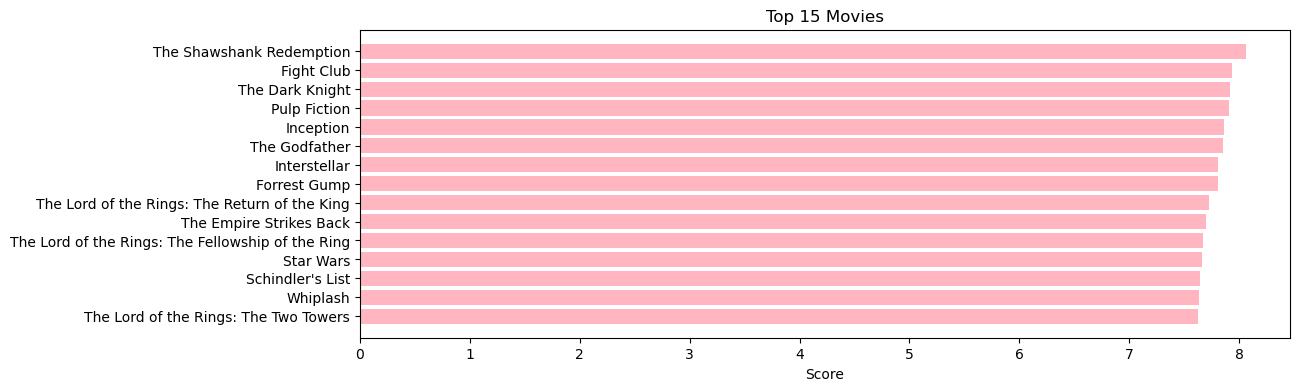

In [16]:
plt.figure(figsize=(12, 4))
plt.barh(q_movies['tittle'].head(15), q_movies['score'].head(15), align='center', color='lightpink')
plt.gca().invert_yaxis()
plt.xlabel("Score")
plt.title("Top 15 Movies")

We made our first recommender. 

These are the top 15 movies we made from our recommender

Under the Trending Now tab, we find movies that are very popular and they can be obtained by sorting the datset by the popularity column.

In [17]:
popular = movies.sort_values('popularity', ascending=False)

Text(0.5, 1.0, 'Popular Movies')

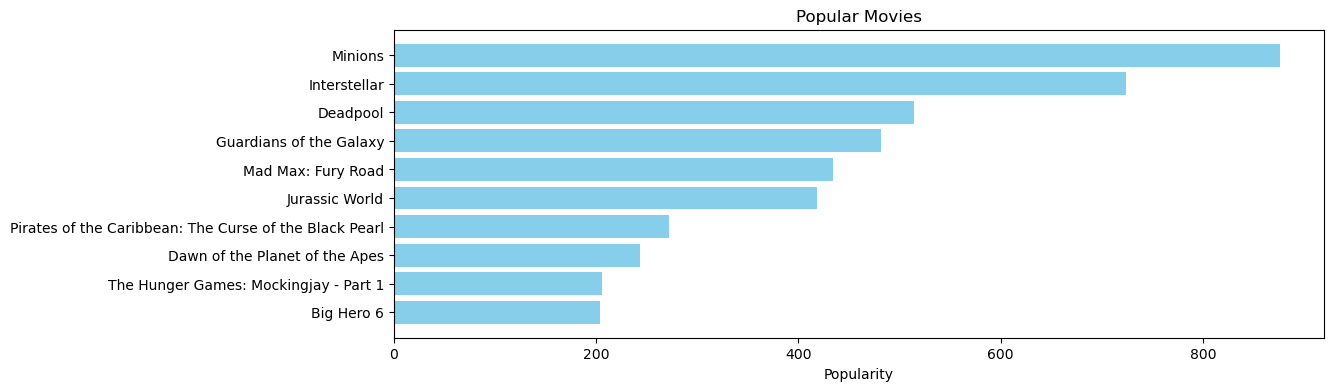

In [18]:
plt.figure(figsize=(12,4))
plt.barh(popular['title'].head(10),popular['popularity'].head(10), align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

These demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user.

CONTENT BASED FILTERING

Content based filtering is a more refined system.

In this type of recommendation system, the content of the movie (overview, cast, crew, etc) is used to find its similarity with the other movies. Then the movies that are most likely to be similar are recommended.

Plot description based Recommender :

We will compute similairity scores for all movies based on their plot descriptions and recommend movies based on that similairty score. 

The plot description is given in the overview feature of our dataset.

In [19]:
movies['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Now we'll compute Term frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Term Frequency is the relative frequency of a word in a document and is given as (term instances/total instances).

Inverse document Frequency is the relative count of documents containing the term is giveb as log(number of documents/documents with term).

The overall importance of each word to the documents in which they appear is equal to TF*IDF

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.


This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix

In [20]:
# Importing TfTdfVectorizer from scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-TDF Vectorizer Object. Remove all english stop words such as 'the', 'a'

tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN with an empty string

movies['overview'] = movies['overview'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data

tfidf_matrix = tfidf.fit_transform(movies['overview'])

# Output the shape of tfidf_matrix

tfidf_matrix.shape

(4803, 20978)

We can see that over 20,000 different words were used to describe the 4800 movies in our dataset.

We will use the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies.

Since it is independent of magnitude and is relatively easy and fast to calculate.

Since we use the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score.

In [21]:
# import linear_kernal

from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We will define a function that takes a movie title as an input and outputs a list of the 10 most similar movies.

In [22]:
# Construct a reverse map of indices and movie titles

indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

Steps we will follow to define our recommendation systems :
    
    - Get the index of the movie given its title.
    - Get the list of cosine similarity scores for that particular movie with all movies
      Convert it into a list of tuples where the first element is its position and the second is the similarity score.
    - Sort the aforementioned list of tuples based on the similarity scores, i.e. the second element.
    - Get the top 10 elements of this list. Ignore the first element as it refers to self. (the movie most similar to a particular movie is itself)
    - Return the titles corresponding to the indices of the top elements.

In [23]:
# Function that takes in movie title as input and outputs most similar movies

def get_recommendations(title, cosine_sim=cosine_sim):
    
    # Get the index of the movie that matches the title 
    idx = indices[title]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

In [24]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [25]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. 

"The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies.

We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

 

In [26]:
# Parse the stringified features into their corresponding python objects

from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']

for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

In [27]:
# Get the director's name from the crew feature. If director name is not listed, return NaN

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [28]:
# Returns the top 3 elements or entire list; whichever is more.

def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        
        # Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names
    
    # Return empty list in case of missing/malformed data
    return []

In [29]:
# Define new director, cast, genres and keywords features that are in a suitable form

movies['director'] = movies['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [30]:
# Print the new features of the first 3 films

movies[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. 

This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [31]:
# Function to convert all strings to lower case and strip names of spaces

def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        # Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [32]:
# Applying clean_data function to our features

features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movies[feature] = movies[feature].apply(clean_data)

to create a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [33]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + x['director'] + ' ' + ' '.join(x['genres'])

movies['soup'] = movies.apply(create_soup, axis=1)

In [34]:
# Import CountVectorizer and create the count matrix

from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(movies['soup'])

In [35]:
# Compute the CoSine similarity matrix based on the count_matrix

from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [36]:
# Reset index of our main DataFrame and construct reverse mapping as before

movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title'])

In [37]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
1253               Kiss of Death
1278                  The Gunman
Name: title, dtype: object

In [38]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2649           The Son of No One
4638    Amidst the Devil's Wings
1170     The Talented Mr. Ripley
1394               Donnie Brasco
1850                    Scarface
2280                 Sea of Love
2731      The Godfather: Part II
2792         Glengarry Glen Ross
3450             West Side Story
Name: title, dtype: object

In [39]:
get_recommendations('The Avengers', cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object

Our recommender is successful in giving us better recommendations

Our recommender is only capable of suggesting movies which are close to a certain movie.

It is not personal and it doesn't capture the personal tastes and biases of a user. 

Anyone using our recommender will receive the same recommendations for a movie, regardless of who he/she is.

COLLABORATIVE FILTERING

It is of two types:
    
    - User Based Filtering : These systems recommend products to a user that similar users have liked.
    
     One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance.
     
     
     - Item Based Collaborating Filtering :  the item-based CF recommends items based on their similarity with the items that the target user rated.
     
      the main issue is scalability. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items.
      sparsity is another concern
      
      
      One way to handle the scalability and sparsity issue created by CF is to leverage a latent factor model to capture the similarity between users and items.
    

Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset.

In [40]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv(r"C:\Users\shres\OneDrive\Desktop\Data Science\Recommendation System\ratings_small.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [41]:
from surprise.model_selection import train_test_split
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

In [42]:
svd = SVD()
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9009  0.8968  0.9018  0.8914  0.9005  0.8983  0.0038  
MAE (testset)     0.6940  0.6895  0.6939  0.6868  0.6920  0.6912  0.0027  
Fit time          2.74    2.81    2.82    2.82    2.80    2.80    0.03    
Test time         0.55    0.30    0.54    0.31    0.30    0.40    0.12    


In [43]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [44]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [45]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.741287979787819, details={'was_impossible': False})

In [46]:
# Initialize and fit the SVD model
svd = SVD()
svd.fit(trainset)

In [47]:
# Replace '1' with the user ID you want to make recommendations for
user_id = 1

In [48]:
# Get a list of unique movie IDs
movie_ids = ratings['movieId'].unique()

# Initialize a list to store movie names and their predicted ratings
movie_names_and_ratings = []

for movie_id in movie_ids:
    # Predict the rating for the user and movie
    prediction = svd.predict(user_id, movie_id)
    
    # Get the movie name from the movie ID
    movie = movies[movies['id'] == movie_id]  # Find the row with the matching movie ID
    if not movie.empty:
        movie_name = movie['title'].iloc[0]  # Assuming 'title' is the column with movie names
        movie_names_and_ratings.append((movie_name, prediction.est))

# Sort the list by predicted ratings in descending order
movie_names_and_ratings.sort(key=lambda x: x[1], reverse=True)

# Display the top recommended movies
top_recommendations = movie_names_and_ratings[:10]  # You can change the number to get more or fewer recommendations

for movie_name, predicted_rating in top_recommendations:
    print(f"Movie: {movie_name}")

Movie: Mission: Impossible
Movie: Solaris
Movie: The Thomas Crown Affair
Movie: The Talented Mr. Ripley
Movie: Terminator 3: Rise of the Machines
Movie: Beverly Hills Cop III
Movie: License to Wed
Movie: Pandora's Box
Movie: Men in Black II
Movie: Galaxy Quest


CONCLUSION

I have built 3 different recommendation engines based on different ideas and algorithms :

 - Simple Recommender: This system used overall IMDB Vote Count and Vote Averages to build Top Movies Charts, in general and for a specific genre. The IMDB Weighted Rating System was used to calculate ratings on which the sorting was finally performed.
 
 - Content Based Recommender: We built two content based engines; one that took movie overview and taglines as input and the other which took metadata such as cast, crew, genre and keywords to come up with predictions.
 
 - Collaborative Filtering: We used the powerful Surprise Library to build a collaborative filter based on single value decomposition which generates predictions by analyzing user behavior